In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [2]:
def Ef_Rep(pi, mu, eps, tau, psi, rho, d1, eta1, eta2,eta4, F10, F20, T10, T20, beta1, beta2, xi, phi1, delta, h1, h2, rhot):
    
    
    S1_dfe = pi/(F10 +mu); S2_dfe = (pi*phi1*F10)/((phi1+mu)*(F10+mu)*(F20+mu)); V1_dfe = (pi*F10)/((phi1+mu)*(F10 +mu));
    V2_dfe = (pi*phi1*F10*F20)/(mu*(phi1+mu)*(F10+mu)*(F20+mu));
    N_dfe = S1_dfe + S2_dfe + V1_dfe + V2_dfe;
    
    C1 = (beta1*S1_dfe)/N_dfe;  C2 = (1/N_dfe)*(beta2*((1-eta2)*S2_dfe + (1-eta4)*V2_dfe + (1-eta1)*V1_dfe));
    M1 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T10))
    M2 = (eps*tau)/((mu +eps)*(d1+mu+rho+T10))
    M3 = (eps*tau)/((mu +eps)*(d1+mu+rho+T20))
    M4 = ( xi*(1-tau)*T10*eps*(d1+mu+rho+T10) + tau*T10*eps*(mu+rho+xi*T10))/((mu +eps)*(d1+mu+rho+T10)*(h1+mu+rhot)*(mu+rho+xi*T10))
    M5 = tau*T20*eps/((mu +eps)*(d1+mu+rho+T20)*(h2+mu+rhot))
    M6 = (eps*(1-tau))/((mu +eps)*(mu+rho+xi*T20))
    M7 = xi*(1-tau)*eps*T20/((mu +eps)*(mu+rho+xi*T20)*(h2+mu+rhot))
    return C1*(psi*M1 + M2 + M3 + (1-delta)*(M4+M5)) + C2*(psi*M6 + (1-delta)*M7)

#Fixed parameter values

# Define the parameters and baseR0
# params = {'pi':1710, 'mu': 1/(83*365), 'eps': 1/5.1, 'tau': 0.3, 'psi1': 0.5, 'rho': 1/14, 'd1': 0.000811,
#           'eta1': 0.71, 'eta2': 0.41, 'eta3': 0.85, 'F10': 0.011, 'F20': 0.002, 'T10': 5e-6, 'T20': 0.5, 'beta1': 1.14,
#           'beta2': 0.829, 'xi': 0.319, 'phi1': 1/180}
params = {'pi':1710, 'mu': 1/(83*365), 'eps': 0.33, 'tau': 0.8, 'psi': 0.5, 'rho': 1/14, 'd1': 0.000071,
          'eta1': 0.71, 'eta2': 0.41, 'eta4': 0.85, 'F10': 0.0029, 'F20': 0.00261, 'T10': 0.03, 'T20': 0.03, 'beta1': 0.67,
          'beta2': 0.39, 'xi': 0.99, 'phi1': 1/180, 'delta':0.8, 'h1':0.0012, 'h2':0.000312, 'rhot':1/10}
baseRe = Ef_Rep(params['pi'], params['mu'], params['eps'], params['tau'], params['psi'], params['rho'],
                params['d1'], params['eta1'], params['eta2'],params['eta4'], params['F10'], params['F20'], params['T10'], params['T20'],
                params['beta1'], params['beta2'], params['xi'], params['phi1'],params['delta'], params['h1'], params['h2'], params['rhot'])
print('Base Re = ', baseRe)
# Calculate sensitivity indices

sensitivity_indices = []
sensitivity_indices1 = []
for parameter in params:
    old_parameter_value = params[parameter]
    
    # Perturb the parameter value by 0.1%
    new_parameter_value = old_parameter_value * 1.001
    
    # Create a copy of the parameters dictionary to preserve the original values
    ud_params = params.copy()
    
    # Update the parameter and recalculate R0
    ud_params[parameter] = new_parameter_value

    newRe = Ef_Rep(ud_params['pi'], ud_params['mu'], ud_params['eps'], ud_params['tau'], ud_params['psi'],
                   ud_params['rho'],ud_params['d1'], ud_params['eta1'], ud_params['eta2'], ud_params['eta4'],ud_params['F10'],
                   ud_params['F20'], ud_params['T10'], ud_params['T20'], ud_params['beta1'], ud_params['beta2'], ud_params['xi'],
                   ud_params['phi1'], ud_params['delta'],ud_params['h1'], ud_params['h2'], ud_params['rhot'])
    
    # Calculate sensitivity indices
    delta_parameter = new_parameter_value - old_parameter_value
    delta_Re = newRe - baseRe
    sensitivity_index = (old_parameter_value / baseRe) * (delta_Re / delta_parameter)

    if parameter == 'eta2':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'pi':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'eps':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'eta1':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'mu':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'eta4':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'phi1':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'd1':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'h1':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'h2':
        sensitivity_indices1.append((parameter, sensitivity_index)) 
    elif parameter == 'rho':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'rhot':
        sensitivity_indices1.append((parameter, sensitivity_index))
    elif parameter == 'xi':
        sensitivity_indices1.append((parameter, sensitivity_index)) 
    elif parameter == 'tau':
        sensitivity_indices1.append((parameter, sensitivity_index))
    else:
        sensitivity_indices.append((parameter, sensitivity_index))
    
    #sensitivity_indices.append((parameter, sensitivity_index))

# Print the results sorted
parameters_names, sensitivity_values = zip(*sensitivity_indices)
sorted_data = sorted(sensitivity_values, key=lambda x: abs(x))
for parameter, sensitivity_index in sensitivity_indices:
    
    print(f"{parameter}: {sensitivity_index}")
print('Sorted:')
sorted_data
#print('Not plotted params:')
# for parameter, sensitivity_index in sensitivity_indices1:
#     print(f"{parameter}: {sensitivity_index}")
#print('sensitivity index of eta2 =', eta2_sensitivity_index )


Base Re =  0.20083454788859323
psi: 0.33371757913838646
F10: -0.6563735767060489
F20: -0.011438504907969842
T10: -0.08284227745932428
T20: -0.13717298402393502
beta1: 0.668276790674279
beta2: 0.33172320932560784
delta: -0.2987568157254769
Sorted:


[-0.011438504907969842,
 -0.08284227745932428,
 -0.13717298402393502,
 -0.2987568157254769,
 0.33172320932560784,
 0.33371757913838646,
 -0.6563735767060489,
 0.668276790674279]

In [3]:
# parameters_names, sensitivity_values = zip(*sensitivity_indices)

# fig = plt.subplots(figsize=(12,5))
# sorted_data = sorted(sensitivity_values, key=lambda x: abs(x))
# plt.barh(range(len(sorted_data)),   sorted_data) #sensitivity_values
# plt.ylabel('Parameters')
# plt.xlabel('Sensitivity index')
# #plt.title('Sensitivity Indices')

# #param = [r'Manadatory testing in primary dynamics, $T_{10}$',r'Proportion of asymptomatic individuals, $\tau$',r'Manadatory vaccination in secondary dynamics, $F_{20}$',
#          # r'Test seeking rate for asymptomatci class, $\xi$',r'Manadatory testing in secodnary dynamics, $T_{20}$',r' Recovery rate, $\rho$',r'Manadatory vaccination in primary dynamics, $F_{10}$', 
#          # r'Transmission rate in primary dynamics, $\beta_1$', r'Transmission rate in secondary dynamics, $\beta_2$', r'Infectiousness of asymptomatic relative to symptomatic,$\psi$'  ]
# param = [r'Manadatory testing in primary dynamics, $T_{10}$',r'Manadatory vaccination in secondary dynamics, $F_{20}$',r'Manadatory vaccination in primary dynamics, $F_{10}$',r'Proportion of asymptomatic individuals, $\tau$',
#          r' Recovery rate, $\rho$', r'Test seeking rate for asymptomatci class, $\xi$',r'Manadatory testing in secodnary dynamics, $T_{20}$',
#          r'Transmission rate in primary dynamics, $\beta_1$', r'Transmission rate in secondary dynamics, $\beta_2$', r'Infectiousness of asymptomatic relative to symptomatic,$\psi$'  ]
# plt.yticks(range(len(param)), param)
# #plt.yticks(parameters_names,[r'$\mu$', r'$\tau$', r'$\psi$' , r'$\rho$', r'$d_1$',r'$F_{10}$',r'$F_{20}$',r'$T_{10}$',r'$T_{20}$',r'$\beta_1$', r'$\beta_2$']) 
# plt.tight_layout()
# #plt.savefig('sensitivity.pdf', dpi =600)

# plt.show()

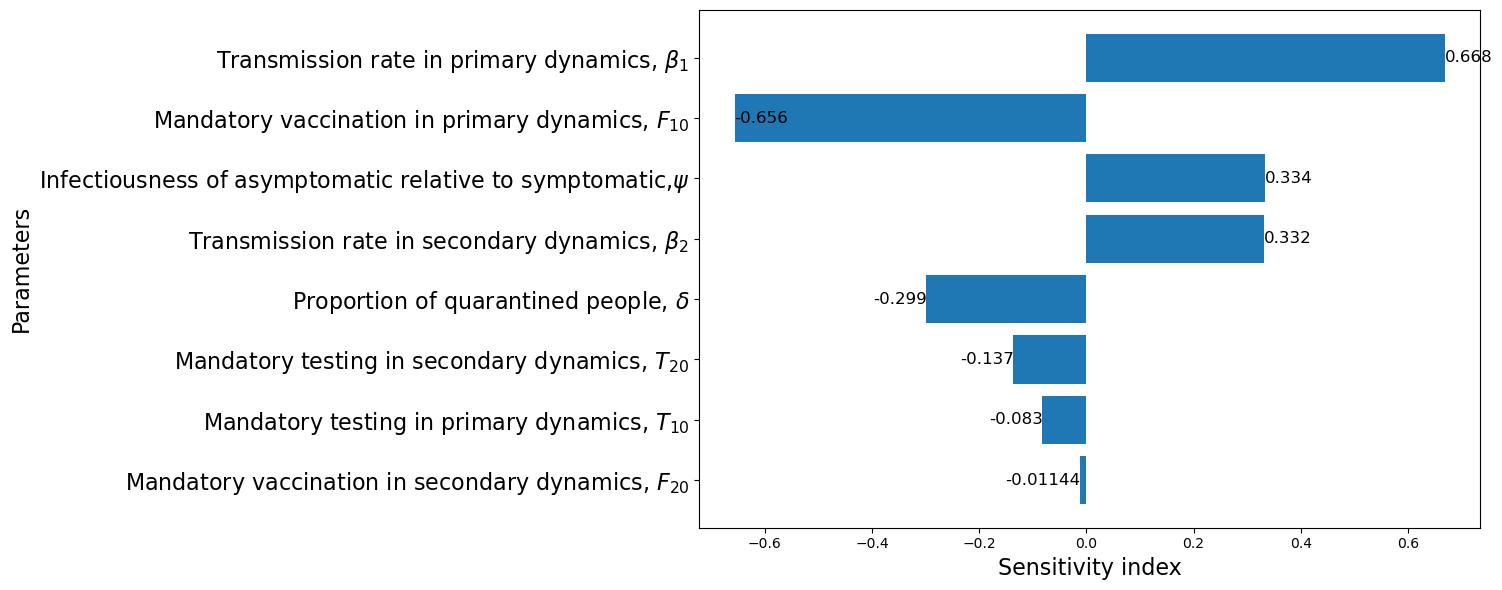

In [4]:
parameters_names, sensitivity_values = zip(*sensitivity_indices)

fig, axs = plt.subplots(figsize=(15,6))
sorted_data = sorted(sensitivity_values, key=lambda x: abs(x))
bars = axs.barh(range(len(sorted_data)),   sorted_data) #sensitivity_values
axs.set_ylabel('Parameters', fontsize=16)
axs.set_xlabel('Sensitivity index', fontsize=16)
#plt.title('Sensitivity Indices')

# param = [r'Manadatory testing in primary dynamics, $T_{10}$',r'Proportion of asymptomatic individuals, $\tau$',r'Manadatory vaccination in secondary dynamics, $F_{20}$',
#          r'Test seeking rate for asymptomatci class, $\xi$',r'Manadatory testing in secodnary dynamics, $T_{20}$',r' Recovery rate, $\rho$',r'Manadatory vaccination in primary dynamics, $F_{10}$', 
#          r'Transmission rate in primary dynamics, $\beta_1$', r'Transmission rate in secondary dynamics, $\beta_2$', r'Infectiousness of asymptomatic relative to symptomatic,$\psi$'  ]
param = [r'Mandatory vaccination in secondary dynamics, $F_{20}$', r'Mandatory testing in primary dynamics, $T_{10}$', r'Mandatory testing in secondary dynamics, $T_{20}$',
         r'Proportion of quarantined people, $\delta$', r'Transmission rate in secondary dynamics, $\beta_2$', 
          r'Infectiousness of asymptomatic relative to symptomatic,$\psi$',r'Mandatory vaccination in primary dynamics, $F_{10}$', r'Transmission rate in primary dynamics, $\beta_1$']

axs.set_yticks(range(len(param)), param, fontsize=16)
for bar, value in zip(bars, sorted_data):
    if value == sorted_data[0] :
        axs.text(value-0.14, bar.get_y() + bar.get_height() / 2, f'{value:.5f}', ha='left', va='center', fontsize=12, color='black')
    elif value < 0 and value != sorted_data[6]:
        axs.text(value-0.099, bar.get_y() + bar.get_height() / 2, f'{value:.3f}',ha='left', va='center', fontsize=12, color='black')
    elif value <0 and value == sorted_data[6]:
        axs.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', ha='left', va='center', fontsize=12, color='black')
        
    else:
        axs.text(value, bar.get_y() + bar.get_height() / 2, f'{value:.3f}', ha='left', va='center', fontsize=12, color='black')

#plt.yticks(parameters_names,[r'$\mu$', r'$\tau$', r'$\psi$' , r'$\rho$', r'$d_1$',r'$F_{10}$',r'$F_{20}$',r'$T_{10}$',r'$T_{20}$',r'$\beta_1$', r'$\beta_2$']) 
plt.tight_layout()
#plt.savefig('sensitivity1_New_BB.pdf', dpi =600)
plt.show()

In [5]:
sorted_data

[-0.011438504907969842,
 -0.08284227745932428,
 -0.13717298402393502,
 -0.2987568157254769,
 0.33172320932560784,
 0.33371757913838646,
 -0.6563735767060489,
 0.668276790674279]

In [6]:
sensitivity_values = sensitivity_values
sensitivity_values

(0.33371757913838646,
 -0.6563735767060489,
 -0.011438504907969842,
 -0.08284227745932428,
 -0.13717298402393502,
 0.668276790674279,
 0.33172320932560784,
 -0.2987568157254769)

In [7]:
sorted_data = sorted(sensitivity_values, key=lambda x: abs(x))

In [8]:
sorted_data

[-0.011438504907969842,
 -0.08284227745932428,
 -0.13717298402393502,
 -0.2987568157254769,
 0.33172320932560784,
 0.33371757913838646,
 -0.6563735767060489,
 0.668276790674279]